###Welcome 

In this project we will be predicting honey production using a linear regression model

We will use a dataset from Kaggle seen in the data science career path on Codecademy, the dataset contains honey production in the United States from 1998 until 2012

In [37]:
#Let's import the libraries we will be using for our analysis

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [38]:
#First we read in the dataset
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

In [39]:
#And print the first 10 rows
print(df.head(10))

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   
5    FL  230000.0           98  22540000.0   4508000.0        0.64   
6    GA   75000.0           56   4200000.0    307000.0        0.69   
7    HI    8000.0          118    944000.0     66000.0        0.77   
8    ID  120000.0           50   6000000.0   2220000.0        0.65   
9    IL    9000.0           71    639000.0    204000.0        1.19   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
5  14426000.0  1998  
6   2898000.0  1998  
7    727000.0  1998  
8   3900000.0  1998  
9    7600

In [40]:
#We can see this is a fairly small dataset
df.count()

state          626
numcol         626
yieldpercol    626
totalprod      626
stocks         626
priceperlb     626
prodvalue      626
year           626
dtype: int64

This dataset has been previously cleaned. For the purpose of this exercise we will only run a linear regression model and plot the predicted results

We want 2 specific variables from the dataset, these are totalprod which contains the total honey production by state = this is our target variable. And our second variables is year, in order to predict the honey production for future years.

In [41]:
#We select the average total producton and group it by year
production_per_year = df.groupby('year').totalprod.mean().reset_index()
print(production_per_year.head(15).round(2))

    year   totalprod
0   1998  5105093.02
1   1999  4706674.42
2   2000  5106000.00
3   2001  4221545.45
4   2002  3892386.36
5   2003  4122090.91
6   2004  4456804.88
7   2005  4243146.34
8   2006  3761902.44
9   2007  3600512.20
10  2008  3974926.83
11  2009  3626700.00
12  2010  4382350.00
13  2011  3680025.00
14  2012  3522675.00


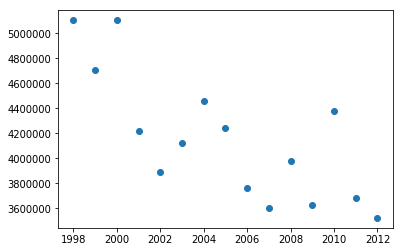

In [61]:
#We now define our x and y variables to display a scatterplot
x = production_per_year['year']
#Note: what this does is create a column with one value per row, instead of having one row with values)
x = x.values.reshape(-1, 1)
y = production_per_year['totalprod']

plt.scatter(x, y)
plt.show()

We can see that as years go by the honey production across the U.S is dramatically decreasing

Let's run a linear regression model 

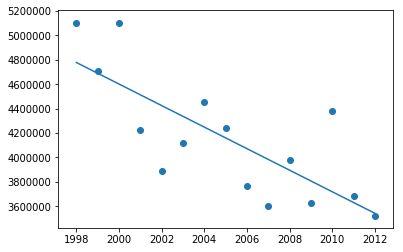

In [62]:
#First we call the model from the scikit learn library
regression = linear_model.LinearRegression()

#Then fit the model for our x and y variables
regression.fit(x, y)

#The prediction the model will make on the data stored on the x axis
y_prediction = regression.predict(x)

#We plot the prediction line on top of the scatter plot
plt.plot(x, y_prediction)
plt.scatter(x, y)
plt.show()

Great now let's predict the next 20 years of honey production

In [68]:
#We create a numpy array which includes years from 2013 until 2032
x_upcoming_years = np.array(range(2013, 2033))

#Reshape our data so scikit learn can run the linear model 
x_upcoming_years = x_upcoming_years.reshape(-1, 1)

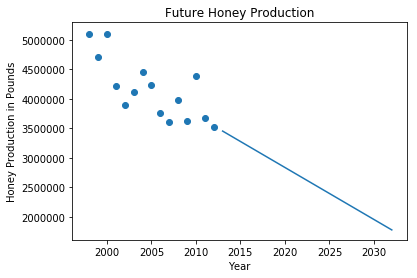

In [72]:
#The model will now run based on our new set of values for the x axis
production_years = regression.predict(x_upcoming_years)

#Let's plot the graph
plt.plot(x_upcoming_years, production_years)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Honey Production in Pounds')
plt.title('Future Honey Production')
plt.show()

Great! that ends our project "Predicting Honey Production Using Linear Regression"

Thank you for reading